# PICSHEP TUTORIAL
$\nu$ - DM interactions in Blazars

#### Loading the PICSHEP package

In [1]:
import sys
src_path = "../../src/"
sys.path.append(src_path)
from PICSHEP import *

.______    __    ______     _______. __    __   _______ .______   
|   _  \  |  |  /      |   /       ||  |  |  | |   ____||   _  \  
|  |_)  | |  | |  ,----'  |   (----`|  |__|  | |  |__   |  |_)  | 
|   ___/  |  | |  |        \   \    |   __   | |   __|  |   ___/  
|  |      |  | |  `----.----)   |   |  |  |  | |  |____ |  |      
| _|      |__|  \______|_______/    |__|  |__| |_______|| _|      
                                                                  

**************************************************************************
Particle Interactions Cascade equation Solver for High Energy Physics

Author: シヴァサンカール ShivaSankar K.A 

Affiliation: 北海道大学宇宙理学専攻、大学院理学院, 北海道大学
 Department of CosmoSciences, Graduate School of Science, Hokkaido University

Email: shivasankar.ka@gmail.com

Last update: 2023/03/27
**************************************************************************


### Initializing CES and model
The required functions are defined in the PICSHEP package in the ces and model classs. Therefore, We initialize them first. 

In [162]:
CES = ces()
model = Model("Blazar_U1X", path="./")

### Intializing the input functions
The required inputs such as cross section, differential cross section, unattenuated flux and effective area of interaction can be provided using the inbuilt functions as shown below in this example. You can either provide the functional form or the numerical data which will be interpolated. 

In [171]:
F0 = 13.22
F1 = 1.498
F2 = -0.00167
F3 = 4.119

xchi = 2.0
xH = -2
xv = -1/2*(xH) - 1.0
QX = xchi**2 * xv**2

#U(1)_X cross section

model.set_diff_cross_section(diff_cross_section="lambda E,x,a,b,dm_mass: "+str(QX)+"* a*(1 + E**2/x**2)* 1/((1+2*b*(x-E))**2)")

model.set_cross_section(cross_section="lambda E,a,b,m_chi: "+str(QX)+"* (1/(4*b**3*E**2))*a*(2*b*E**2*((4*b*E*(2*b*E+1)+1)/(4*b*E**2+2*E+m_chi))+1/(2*E+m_chi)-(2*b*E+1)*np.log(4*b*E**2+2*E+m_chi)+(2*b*E+1)*np.log(2*E+m_chi))")

model.set_flux_func(Flux="10**(-"+str(F0)+" - ("+str(F1)+"*np.log10(E))/(1 + "+str(F2)+" * np.abs(np.log10(E))**"+str(F3)+"))")

model.set_eff_area_func(Effective_area="10**(3.57 + 2.007*np.log10(E) -0.5263* np.log10(E)**2 +0.0922 * np.log10(E)**3 -0.0072* np.log10(E)**4)")

model.set_NP_parameterization(m="np.sqrt(dm_mass/(B))",
                              g="(mzp**2) * np.sqrt(A/(Sigma*10**3)) * np.sqrt(8*np.pi)"
                              )

Differential cross section function intialized:
lambda E,x,a,b,dm_mass: 0.0* a*(1 + E**2/x**2)* 1/((1+2*b*(x-E))**2)

Cross section function intialized:
lambda E,a,b,m_chi: 0.0* (1/(4*b**3*E**2))*a*(2*b*E**2*((4*b*E*(2*b*E+1)+1)/(4*b*E**2+2*E+m_chi))+1/(2*E+m_chi)-(2*b*E+1)*np.log(4*b*E**2+2*E+m_chi)+(2*b*E+1)*np.log(2*E+m_chi))

Flux function initialized:
10**(-13.22 - (1.498*np.log10(E))/(1 + -0.00167 * np.abs(np.log10(E))**4.119))

Effective Area Intialized:
10**(3.57 + 2.007*np.log10(E) -0.5263* np.log10(E)**2 +0.0922 * np.log10(E)**3 -0.0072* np.log10(E)**4)

Parameterization of new physics parameters initialized:
 m=np.sqrt(dm_mass/(B))
 g=(mzp**2) * np.sqrt(A/(Sigma*10**3)) * np.sqrt(8*np.pi)



In [172]:
model.DM_model_info()

 ____  __  __                   _   _            
|  _ \|  \/  |  _ __ ___   __ _| |_| |_ ___ _ __ 
| | | | |\/| | | '_ ` _ \ / _` | __| __/ _ \ '__|
| |_| | |  | | | | | | | | (_| | |_| ||  __/ |   
|____/|_|  |_| |_| |_| |_|\__,_|\__|\__\___|_|   
                                                 
                     _      _     
 _ __ ___   ___   __| | ___| |___ 
| '_ ` _ \ / _ \ / _` |/ _ \ / __|
| | | | | | (_) | (_| |  __/ \__ \
|_| |_| |_|\___/ \__,_|\___|_|___/
                                  

*****************************************************************************

The available dark matter models are: 
 1)BM1, BM1` 
 2)BM2, BM2` 
 3)BM3, BM3`

*****************************************************************************



We set the model with the functions defined above

In [173]:
CES.set_model(model=model)

CES.events calculates the no of events for the selected parameter range in the energy range provided. The input required are
1. $E_{\text{min}}$: The minimum energy of inteaction above which we need to calculate the events
2. $E_{\text{max}}$: The maximum energy which should theoretically be $\infty$, but for numerical purposes, it is the maximum energy where the flux function is well defined. 
3. $t_{\text{obs}}$: The observation time of the experiment in consideration (ICECUBE in this case)
4. $A$ and $B$ are the two parameters used to parameterize the cross section and differential cross section. Provide a range in which you want to probe these parameters. 

In [155]:
CES.events(Emin=290, Emax=10**4, t_obs= 898*24*3600, A_range=[-4,2.5], B_range=[-4,0.5], N=50, N_eig=30, method="numpy")



Computing..................................................
Time taken:  75.78564405441284  seconds



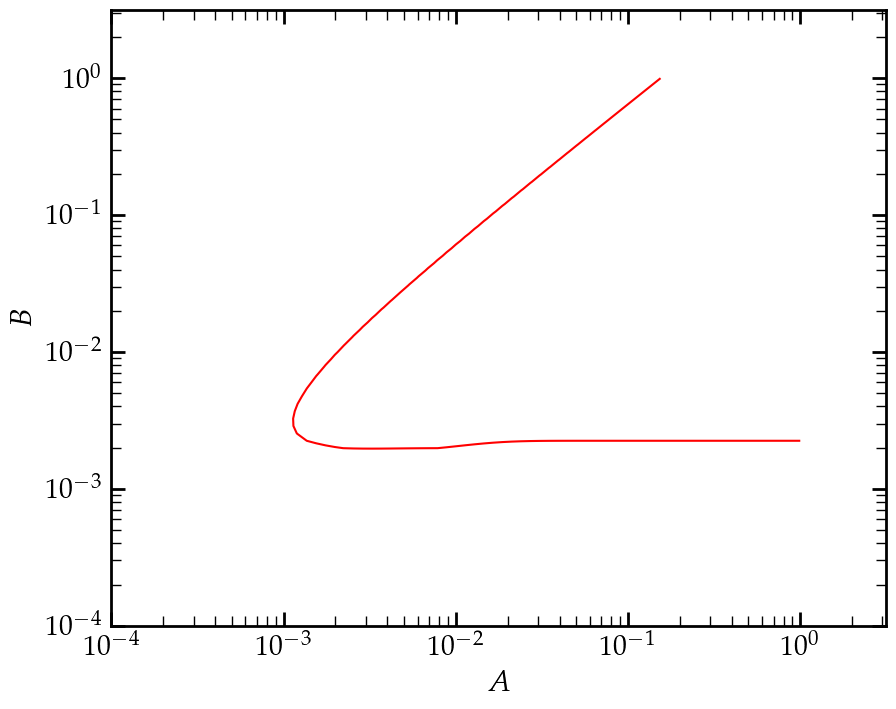

In [174]:
CES.plot(xlim=[10**-4,10**0.5],
        ylim=[10**-4,10**0.5],
        title="AvsB_U(1)X_xH=1.0_",
        do_plot = False,
        plotsave=True,
        event_threshold=0.1)

Thy Bidding is done, My Master 



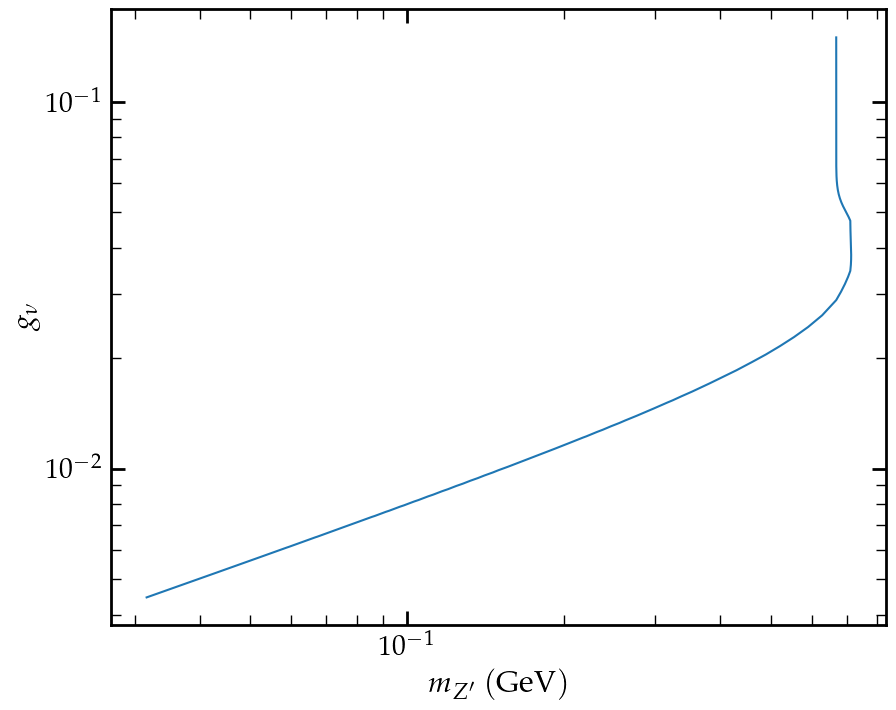

In [175]:
CES.plotmvsg(title="U(1)X_xH=1.0_", plotsave=True)

In [ ]:
# CES.attenuated_flux(Emin=290, Emax=10**4, N_eig=100,Aval=10*1,Bval=10**1)

In [ ]:
# CES.eigcalc(Energy=290, num=10, a=0.1, b=0.1)

In [ ]:
# CES.total_events(Emin=1.5,Emax=15,Aval=0.0,Bval=10**2,t_obs= 3186*24*3600,N_eig=10,method="numpy")

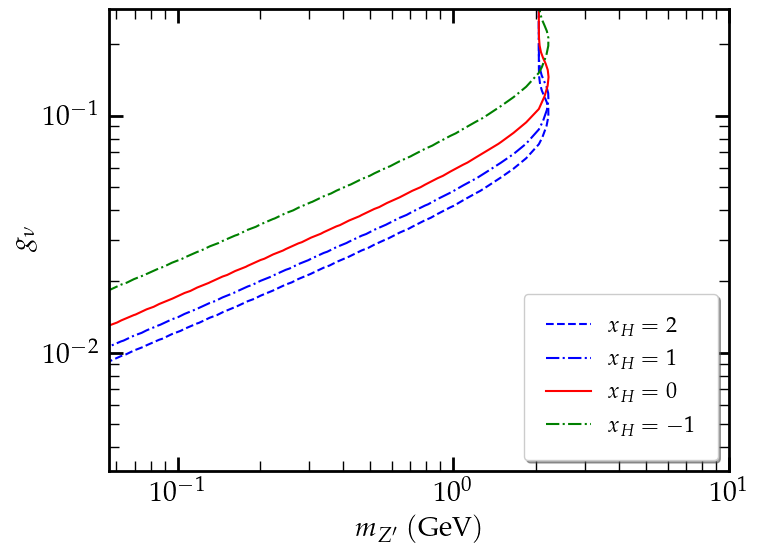

In [160]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import multiprocessing as mp

data1 = np.loadtxt("/Users/shivasankark.a/Documents/Research_work/Tools/PICSHEP/Models/Blazar_U1X/events_data/mvsg_U(1)X_xH=2_mchi=0.01_m_dm=0.01-BM1.csv",delimiter=",")
data2 = np.loadtxt("/Users/shivasankark.a/Documents/Research_work/Tools/PICSHEP/Models/Blazar_U1X/events_data/mvsg_U(1)X_xH=1_mchi=0.01_m_dm=0.01-BM1.csv",delimiter=",")
data3 = np.loadtxt("/Users/shivasankark.a/Documents/Research_work/Tools/PICSHEP/Models/Blazar_U1X/events_data/mvsg_U(1)X_xH=0_mchi=0.01_m_dm=0.01-BM1.csv",delimiter=",")
data4 = np.loadtxt("/Users/shivasankark.a/Documents/Research_work/Tools/PICSHEP/Models/Blazar_U1X/events_data/mvsg_U(1)X_xH=-1_mchi=0.01_m_dm=0.01-BM1.csv",delimiter=",")
# data5 = np.loadtxt("/Users/shivasankark.a/Documents/Research_work/Tools/PICSHEP/Models/Blazar_U1X/events_data/mvsg_U(1)X_xH=-2_mchi=0.01_m_dm=0.01-BM1.csv",delimiter=",")

plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 16})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
plt.subplots_adjust(wspace=0.35)
ax = fig.add_subplot(111)
ax.set_facecolor('white')

ax.tick_params(which='major',direction='in',width=2,length=10,top=True,right=True, pad=7)
ax.tick_params(which='minor',direction='in',width=1,length=7,top=True,right=True)
        
plt.plot(data1[:,0], np.sqrt(data1[:,1]), color='b', label=r"$x_H = 2$", linestyle='dashed')
plt.plot(data2[:,0], np.sqrt(data2[:,1]), color='b', label=r"$x_H = 1$", linestyle='dashdot')    
plt.plot(data3[:,0], np.sqrt(data3[:,1]), color='r', label=r"$x_H = 0$")
plt.plot(data4[:,0], np.sqrt(data4[:,1]), color='g', label=r"$x_H = -1$", linestyle='dashdot')
# plt.plot(data5[:,0], np.sqrt(data5[:,1]), color='g', label=r"$x_H = -2$", linestyle='dashed')

ax.set_xlim([min(data1[:,0]),10**1])
ax.set_ylim([10**-2.5,max(data1[:,1])])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
# plt.legend(loc='lower right')

legend = plt.legend(frameon=True, fancybox=True, shadow=True, borderpad=1, loc='lower right')
legend.get_frame().set_facecolor('white')

plt.ylabel(r"$g_{\nu}$",fontsize=20)
plt.xlabel(r"$m_{Z^{\prime}} \mathrm{~(GeV)}$",fontsize=20)

plt.savefig("mvsg_U(1)X.pdf") 
plt.show()